<img src="http://stemfellowship.org/wp-content/uploads/2016/10/STEMF-logo-blue-no-back-6.png" alt="STEM Fellowship" style="width:500px;height:120px;">

<h1 style="font-family:georgia;"><p style="text-align: center;"> Welcome to the R for Data Science Workshop! </p></h1>

The Big Data Challenge is a wonderful opporunity to learn new skills in a growing field of STEM, but we know how tough it can be to do something for the first time. These workshops were developed to help newcomers to coding and to Data Science grow comfortable with programming and the Data Science process.  
Have a burning question you want to ask? Feel free to contact us with any comments, questions, or concerns.  
Best wishes,  
The Data Science Team

## THE PROBLEM
An interesting fact about space launches is that solid-fuel rockets emit chlorine gas that can destroy the ozone in the stratosphere. If space travel is in our future, does that mean that the ozone layer is doomed?
Well, not necessarily. SpaceX rockets, for example, are liquid-fuel, and don't contain the chlorine that solid-fuel rockets do. They're also promising products in the development of space travel. To see if these rockets are the solution to ozone-friendly space travel, we can take a look at ozone levels over time and make note of when SpaceX launches occur.
Additionally, we can see if there's any other factors to look into with SpaceX Launches.

## SETUP
To download Python, follow the instructions here.  
Recommended: The python3 Jupyter Kernel
We will also beusing Pandas, Python's data analytics library

## DATA
The first thing to do is to gather data. We want our data to comprise of SpaceX Launches and ozone concentrations. Since that combination is pretty specific, our best bet is to find data on ozone concentrations and data on SpaceX Launches, and then combine them.
For this data
We want data on SpaceX Launches first, so that's where we'll start!

Python supports reading different types of data files, but we'll be dealing with **.csv**, or comma-separated value files. Additionally, there are a few different ways of accessing data - using a direct link, downloading the data and referencing the file, or using an API. For this dataset, we can look at how to use to bring in SpaceX Launch data using a direct link.
The dataset we are referencing was [taken from Kaggle](https://www.kaggle.com/scoleman/spacex-launch-data) and can be found in the GitHub for the 2019 BDC Workshops [here](https://github.com/bigdatachallenge/2019_bdc_workshops/blob/master/spacex_launch_data.csv). In order for Python to be able to interpret the data, we need it to be in raw format. You can access this format by pressing the 'Raw' button or by clicking [here](https://raw.githubusercontent.com/bigdatachallenge/2019_bdc_workshops/master/spacex_launch_data.csv).)
(By the way, now you know why it's called a comma-separated value file!)

So now we have a link!
https://github.com/bigdatachallenge/2019_bdc_workshops/blob/master/spacex_launch_data.csv

To start with, pandas has a `read_csv()` function that can turn our data into a data frame. Let's **store the data** into a **variable** called SpaceX_Launches.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
SpaceX_Launches = pd.read_csv('https://raw.githubusercontent.com/bigdatachallenge/2019_bdc_workshops/master/spacex_launch_data.csv')

We can take a look at the first six rows of our dataset using the `head()` function.

In [3]:
SpaceX_Launches.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


Now that we have our data, we should get an idea of what our data contains. We can do this using the **describe()** function in pandas.

In [4]:
SpaceX_Launches.describe()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
count,57,57,57,57,57,57,55,57,57,57,57
unique,57,57,55,53,4,57,48,8,30,3,12
top,47,2016-05-27,23:03:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-8,"9,600",GTO,NASA (CRS),Success,No attempt
freq,1,1,2,5,26,1,5,22,14,55,18


This gives us some insight into what our data is saying. We see that it spans the years from 2010 to 2018, with the median being at 2017. We can see there are fifty-seven flights recorded by the length indicated under each variable. We also see a a problem; the Payload Mass is an **object** value when it should probably be a **float** value.

With this insight, we are ready to start cleaning. Let's take a look at the Payload Mass column.

In [5]:
SpaceX_Launches['Payload Mass (kg)']

0            NaN
1            NaN
2           525 
3           500 
4           677 
5           500 
6         3,170 
7         3,325 
8         2,296 
9         1,316 
10        4,535 
11        4,428 
12        2,216 
13        2,395 
14          570 
15        4,159 
16        1,898 
17        4,707 
18        1,952 
19        2,034 
20          553 
21        5,271 
22        3,136 
23        4,696 
24        3,100 
25        3,600 
26        2,257 
27        4,600 
28        9,600 
29        2,490 
30        5,600 
31        5,300 
32    Classified
33        6,070 
34        2,708 
35        3,669 
36        9,600 
37        6,761 
38        3,310 
39          475 
40        4,990 
41        9,600 
42        5,200 
43        3,500 
44        2,205 
45        9,600 
46    Classified
47        4,230 
48       ~1,250 
49        2,150 
50        6,092 
51        9,600 
52        2,647 
53          362 
54        3,600 
55        6,460 
56        5,384 
Name: Payload Mass (kg), dtype:

We can immediately understand why the data is a character - there are 'Classified' values and a value that estimates with a tilde in front of it. Lastly, there are spaces at the end of every value. We can modify these columns using the `map` and string index functions. 

In [5]:
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: str(x).replace(",",""))
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: x.strip())
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: -999 if x == "Classified" else x)
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: str(x).replace("~",""))
SpaceX_Launches['Payload Mass (kg)'] = SpaceX_Launches['Payload Mass (kg)'].map(lambda x: -999 if x == "nan" else x)
SpaceX_Launches['Payload Mass (kg)'] = pd.to_numeric(SpaceX_Launches['Payload Mass (kg)'])
SpaceX_Launches['Payload Mass (kg)']

0     -999
1     -999
2      525
3      500
4      677
5      500
6     3170
7     3325
8     2296
9     1316
10    4535
11    4428
12    2216
13    2395
14     570
15    4159
16    1898
17    4707
18    1952
19    2034
20     553
21    5271
22    3136
23    4696
24    3100
25    3600
26    2257
27    4600
28    9600
29    2490
30    5600
31    5300
32    -999
33    6070
34    2708
35    3669
36    9600
37    6761
38    3310
39     475
40    4990
41    9600
42    5200
43    3500
44    2205
45    9600
46    -999
47    4230
48    1250
49    2150
50    6092
51    9600
52    2647
53     362
54    3600
55    6460
56    5384
Name: Payload Mass (kg), dtype: int64

All cleaned up! Now this is cleaner data. Maybe we can even plot it on a graph!

In [6]:
plt.rcParams['figure.figsize'] = [15, 8]
SpaceX_Launches["Date"] = SpaceX_Launches["Date"].astype('datetime64[ns]')
SpaceX_Launches = SpaceX_Launches.set_index('Date')

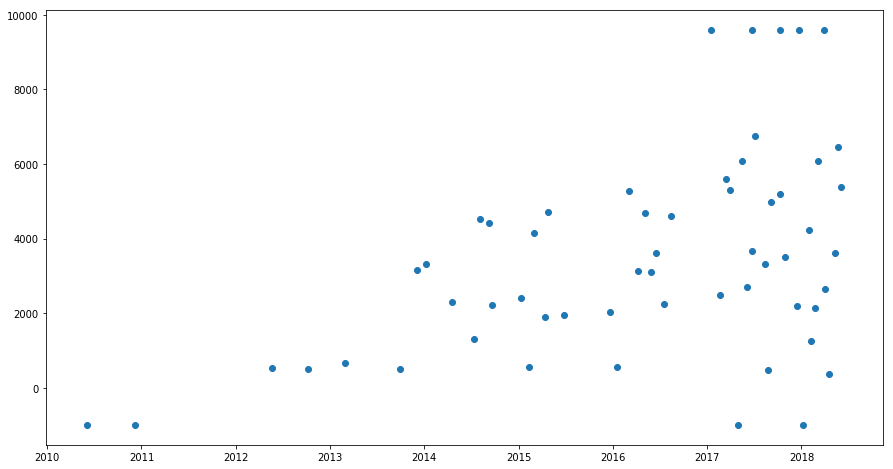

In [7]:
plt.scatter(SpaceX_Launches["Payload Mass (kg)"].index, SpaceX_Launches["Payload Mass (kg)"])
plt.show()

As time goes on, SpaceX seems to have launched heavier and heavier rockets. Interesting!  
But let's not forget what we're here for - we want to look at the levels of ozone and compare them to rocket launch dates. So the first thing is to look at our ozone data. This time, the data is in folders that contain information on different types of gases. It'll be easier to download the data and import it by referencing the file. To do this easily...
1. Make a folder for your data to be in.

 *Name this folder something like 'Workshop Working Directory'.*
 
 
2. Extract the data into that folder.

 *Use a program like WinRAR (Windows) or the Archine Utility (Mac).*


3. Set a variable labelled path to point to your Directory.

In [8]:
path = "/Working Directory"

If you go to your working directoy folder, you'll see 'The Four Gases in Cohorts' has been extracted into a folder. Clicking on this takes you to... four more folders, each with the name of a different gas - Carbon Dioxide, Nitrogen Dioxide, Ozone, and Sulfur Dioxide. Clicking on the Ozone folder, you get a bunch of .csv files! There's way too many to work with. Luckily, each file corresponds to data in three-year intervals. To find out what data we should import, we can check to see the years the most common launches occured in.

To do this, we can use the sort() and the table () functions on the Date coloumn.

In [ ]:
sort(table(as.numeric(format(as.Date(SpaceX_Launches$Date), '%Y'))),decreasing=TRUE)

Conveniently (and somewhat predictably), the three years with the most flights are the three latest consecutive ones - 2016, 2017, and 2018. So, we can safely import the ozone data from years 2016-2018. Let's save it in a variable called Ozone_Data.

In [ ]:
Ozone_Data<-read_csv('The Four Gases in Cohorts//Ozone//Ozone levels from 2016 to 2018.csv')

Fantastic! It seems that all the coloumns have been parsed. To take a peak at our data, we can use the **head()** function.

In [ ]:
head(Ozone_Data)

There seems to be a lot of coloumns - in fact, there's a '...', representing that the head() function skipped a few coloumns when showing the first six rows. This happens to datasets with a large number of coloumns.

To further our investigation, we can check the number of rows and the number of coloumns our dataset has with the **nrow()** and the **ncol()** functions respectively.

In [ ]:
nrow(Ozone_Data)
ncol(Ozone_Data)

That's a lot of coloumns! It's very unlikely that all of them are going to be useful to us. To check out the names of these coloumns, including the 'hidden' ones that the head() function isn't showing us, we can use the **names()** function.

In [ ]:
names(Ozone_Data)

How do we decide what stays and what we should keep? There seem to be an endless amount of choices! One way to lessen the load is to take a look at the **Readme** file for this dataset. The Readme file can be found [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_daily_summary_files).

Reading it, it seems we want to keep location info, time info, and info the best summarizes the measurement of the day.

**Location Data**  
Things like 'Address' or 'City Name' might actually give us too much information, or information not easily worked with, so let's keep Longitude and Latitude. This is numeric data that is easier to quanitfy.
As well, the Readme file describes the Site.Num coloumn as _a unique number within the county identifying the site_, which could also be useful in singling out sites!
Lastly, to have something left to more easily compare the SpaceX Launch data, we'll leave in County data.

_Let's keep Site.Num, Latitude, Longitude, and County._

**Time Data**  
For this, we'll take the local date. Remember, this is the date according to local measurements, so we'd have to consider this if we want to work with timezones.

_Let's keep Date.Local._

**Measurements**  
There's a load of data here, but generally we can keep the measurements for the Arithmetic Mean of the ozone concentration, the units of measurements they're in (in case we have to convert) and, for the sake of investigation and interest, we can keep the Air Quality Index to compare the effect of ozone concentration.

_Let's keep Arithmetic.Mean and AQI._

In [ ]:
Ozone_Data<-Ozone_Data[c('Site.Num', 'Latitude', 'Longitude', 'Date.Local', 'Units.of.Measure', 'Arithmetic.Mean', 'AQI', 'County.Name')]
head(Ozone_Data)

In [ ]:
length(unique(Ozone_Data$Site.Num))-length(unique(Ozone_Data$Latitude))

In [ ]:
unique(Ozone_Data$Units.of.Measure)

In [ ]:
Ozone_Data<-Ozone_Data[-c(1, 5)]
head(Ozone_Data)

In [ ]:
names(Ozone_Data)[6]<-'County'

In [ ]:
summary(Ozone_Data)

In [ ]:
outliers<-Ozone_Data[Ozone_Data$Arithmetic.Mean<0,]

In [ ]:
head(outliers)

In [ ]:
Ozone_Data<-Ozone_Data[-Ozone_Data$Arithmetic.Mean<0,]

In [ ]:
summary(Ozone_Data)

Let's take a look at the standard deviation of our ozone measurements.

In [ ]:
sd(Ozone_Data$Arithmetic.Mean)

In [ ]:
hist(Ozone_Data$Arithmetic.Mean)

In [ ]:
hist(Ozone_Data$Arithmetic.Mean, prob=TRUE)
lines(density(Ozone_Data$Arithmetic.Mean, adjust=3), col="red", lwd=2) 

In [ ]:
cor(Ozone_Data$Arithmetic.Mean, Ozone_Data$AQI)

In [ ]:
install.packages("tidyverse", dependencies=TRUE, repos='http://cran.utstat.utoronto.ca/')
install.packages("bindrcpp", dependencies=TRUE, repos='http://cran.utstat.utoronto.ca/')
library(tidyverse)

In [ ]:
unique(SpaceX_Launches$'Launch Site')

There are only three sites here! In order to link our datasets geographically, we can find out what counties these sites are in and then create a new coloumn.

In [ ]:
SpaceX_Launches<-transform(SpaceX_Launches, County=ifelse(SpaceX_Launches$'Launch Site'=='VAFB SLC-4E', 
                                         'Santa Barbara', 
                                         'Brevard'
                                        ))

In [ ]:
names(Ozone_Data)[3]<-'Date'

In [ ]:
SB_Ozone<-Ozone_Data[Ozone_Data$County=='Santa Barbara',]
Brevard_Ozone<-Ozone_Data[Ozone_Data$County=='Brevard',]

In [ ]:
head(Brevard_Ozone)

In [ ]:
Brevard_Launches<-SpaceX_Launches[SpaceX_Launches$County=='Brevard',]
SB_Launches<-SpaceX_Launches[SpaceX_Launches$County=='Santa Barbara',]

In [ ]:
library(ggplot2)

In [ ]:
ggplot(data=Ozone_Data, aes(x=Ozone_Data$Date, y=Ozone_Data$'Arithmetic.Mean')) + geom_line()

In [ ]:
agg_Ozone<-aggregate(Arithmetic.Mean~Date, Ozone_Data, mean)

In [ ]:
ggplot(data=agg_Ozone, aes(x=agg_Ozone$Date, y=agg_Ozone$'Arithmetic.Mean')) + 
geom_line()

In [ ]:
ggplot(data=agg_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth()

In [ ]:
install.packages('plotly', repos='http://cran.r-project.org')
library(plotly)

In [ ]:
ggplot(data=agg_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth() +
facet_wrap(~format(as.Date(Date, "Y/%M/%D"), '%Y'), ncol=1)

In [ ]:
myPlot<-ggplot(data=agg_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth() +
facet_wrap(~format(as.Date(Date, "Y/%M/%D"), '%Y'), ncol=1)

ggplotly(myPlot)

In [ ]:
install.packages("ggmap", repos='http://cran.r-project.org', force=TRUE)
library("ggmap")

In [ ]:
head(Ozone_Data)

In [ ]:
myMap<-get_map(location='United States',zoom=4)

In [ ]:
ggmap(myMap)

In [ ]:
ggmap(myMap)+
geom_point(data=Ozone_Data, aes(x=Longitude, y=Latitude))

In [ ]:
set.seed(42)

In [ ]:
clusters<-kmeans(Ozone_Data[c('Longitude', 'Latitude')], 6)

In [ ]:
names(clusters)

In [ ]:
length(clusters$cluster)

In [ ]:
Ozone_Data[ncol(Ozone_Data)+1]<-clusters$cluster

In [ ]:
head(Ozone_Data)

In [ ]:
names(Ozone_Data)[7]<-'Zone'

In [ ]:
ggmap(myMap)+
geom_point(data=Ozone_Data, aes(x=Longitude, y=Latitude, col=as.character(Zone)))

In [ ]:
ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth()

In [ ]:
Brevard_Ozone<-(aggregate(Arithmetic.Mean~Date, Brevard_Ozone, mean))

In [ ]:
ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_smooth(method='lm')

In [ ]:
Brev_Ozone_Launch<-merge(Brevard_Ozone, Brevard_Launches, by='Date')

In [ ]:
ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
geom_vline(data=Brevard_Launches, aes(xintercept=Date), col='orange', size=1, alpha=0.5) +
geom_label(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean, label=Payload)) +
geom_point(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean, label=Payload), col='red')

In [ ]:
install.packages("ggrepel", repos='http://cran.utstat.utoronto.ca/')
library(ggrepel)

In [ ]:
myPlot2<-ggplot(data=Brevard_Ozone, aes(x=Date, y=Arithmetic.Mean)) + 
geom_line() + 
#geom_vline(data=Brevard_Launches, aes(xintercept=Date), col='orange', size=1, alpha=0.5) +
geom_label_repel(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean, label=Payload)) +
geom_point(data=Brev_Ozone_Launch, aes(x=Date, y=Arithmetic.Mean), col='red')
myPlot2

In [ ]:
ggplotly(myPlot2)

Is it safe to say that SpaceX Launches *do* cause a decrease in ozone? Not really. It seems we might want to take a closer look time-wise. Conveniently, we already have ozone data in hourly format! Let's import it now for the Brevard County.

In [ ]:
Brevard_Hourly<-read_csv('2017 Hourly Brevard Data.csv')
head(Brevard_Hourly)

Hmm... what an interesting dataset!

In [ ]:
summary(Brevard_Hourly)

In [ ]:
class(Brevard_Hourly$'Local Datetime (EDT)')

In [ ]:
Brevard_Hourly$'Local Datetime (EDT)'<-as.POSIXct(strptime(Brevard_Hourly$'Local Datetime (EDT)', format="%Y-%m-%d %H:%M"))

In [ ]:
summary(Brevard_Hourly)

In [ ]:
Launches17<-Brevard_Launches[format(as.Date(Brevard_Launches$Date, "Y/%M/%D"), '%Y')=='2017',]

In [ ]:
nrow(Launches17)

In [ ]:
names(Brevard_Hourly)[c(3,4)]<-c('Datetime', 'Measurement')

In [ ]:
Launches17<-transform(Launches17, Datetime=as.character(paste(Date, Time..UTC.)))

In [ ]:
times<-as.POSIXct(Launches17$Datetime, tz='GMT')
attributes(times)$tzone<-'EST'
Launches17$Datetime<-times

In [ ]:
class(Brevard_Hourly$Datetime)

In [ ]:
ggplot(data=Brevard_Hourly, aes(x=Datetime, y=Measurement)) +
geom_line()

In [ ]:
Brevard_Hourly<-aggregate(Measurement~Datetime, Brevard_Hourly, mean)

In [ ]:
ggplot(data=Brevard_Hourly, aes(x=Datetime, y=Measurement)) +
geom_line() +
geom_smooth()

In [ ]:
start<-Launches17$Datetime

In [ ]:
end<-start+1*60*60*12

In [ ]:
rects<-data.frame(start, end)

In [ ]:
ggplot(data=Brevard_Hourly, aes(x=Datetime, y=Measurement)) +
geom_line() +
geom_smooth()+
geom_rect(data=rects, inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-Inf,
                ymax=Inf), color="transparent", fill="orange", alpha=0.55)

In [ ]:
lower<-as.character(as.Date(start[1])-1)
upper<-as.character(as.Date(start[1])+2)

In [ ]:
First_Ozone<-Brevard_Hourly[Brevard_Hourly$Datetime>=lower & Brevard_Hourly$Datetime<=upper,]

In [ ]:
ggplot(data=First_Ozone, aes(x=Datetime, y=Measurement)) +
geom_line() +
geom_rect(data=rects[1,], inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-Inf,
                ymax=Inf), color="transparent", fill="orange", alpha=0.55)

In [ ]:
visualizr<-function(index)
{
    lower<-as.character(as.Date(start[index])-1)
    upper<-as.character(as.Date(start[index])+2)
    Index_Ozone<-Brevard_Hourly[Brevard_Hourly$Datetime>=lower & Brevard_Hourly$Datetime<=upper,]
    
    myPlot3 <- ggplot(data=Index_Ozone, aes(x=Datetime, y=Measurement)) +
    geom_line() +
    geom_rect(data=rects[index,], inherit.aes=FALSE, aes(xmin=start, xmax=end, ymin=-Inf,
                ymax=Inf), color="transparent", fill="orange", alpha=0.5) +
    geom_vline(xintercept=start[index], col='navy', size=1.5, alpha=0.5)
    
    return(myPlot3)
}

In [ ]:
visualizr(11)

In [ ]:
Nitrogen_Data<-read_csv('The Four Gases in Cohorts//Nitrogen Dioxide//Nitrogen Dioxide levels from 2016 to 2018.csv')

In [ ]:
head(Nitrogen_Data)

In [ ]:
names(Nitrogen_Data)

In [ ]:
unique(Nitrogen_Data$Units.of.Measure)

In [ ]:
class(Nitrogen_Data$Units.of.Measure)

In [ ]:
Nitrogen_Data$Arithmetic.Mean<-Nitrogen_Data$Arithmetic.Mean/1000

In [ ]:
Nitrogen_Data<-Nitrogen_Data[c('Latitude', 'Longitude', 'Date.Local', 'Arithmetic.Mean', 'AQI')]

In [ ]:
head(Nitrogen_Data)

In [ ]:
names(Nitrogen_Data)[c(3:5)]<-c('Date', 'Nitrogen.Mean', "Nitrogen.AQI")

In [ ]:
names(Ozone_Data)

In [ ]:
names(Ozone_Data)[c(4,5)]<-c('Ozone.Mean', "Ozone.AQI")

In [ ]:
Gas_Data<-merge(Ozone_Data, Nitrogen_Data, by=c('Longitude', 'Latitude', 'Date'))

In [ ]:
ggplot(data=Gas_Data, aes(x=Nitrogen.Mean, y=Ozone.Mean)) + geom_point()

In [ ]:
ggplot(data=Gas_Data, aes(x=Nitrogen.Mean, y=Ozone.Mean)) + geom_point() + xlim(0, 0.06)

In [ ]:
GasPlot<-ggplot(data=Gas_Data, aes(x=Nitrogen.Mean, y=Ozone.Mean)) + geom_point(size=0.01, alpha=0.1) + xlim(0, 0.06)
GasPlot

In [ ]:
GasPlot + geom_smooth(method='lm')

In [ ]:
xy.covar<-cov(Gas_Data$Nitrogen.Mean, Gas_Data$Ozone.Mean, )
x.var<-var(Gas_Data$Nitrogen.Mean)

In [ ]:
lin.slope=xy.covar/x.var

In [ ]:
lin.y.int<-mean(Gas_Data$Ozone.Mean) - mean(Gas_Data$Nitrogen.Mean)*lin.slope

In [ ]:
GasPlot + geom_abline(slope=lin.slope, intercept=lin.y.int, size=1, col='darkred')

In [ ]:
GasPlot <- GasPlot + geom_abline(slope=lin.slope, intercept=lin.y.int, size=1, col='darkred')

In [ ]:
get_r<-function(x,y)
{
    top<-(length(x)*sum(x*y)) - (sum(x)*sum(y))
    bottom<-(length(x)*sum(x^2)-sum(x)^2)*(length(y)*sum(y^2)-sum(y)^2)
    print(top)
    print(bottom)
    return(top/bottom)
}

In [ ]:
get_r(Gas_Data$Nitrogen.Mean, Gas_Data$Ozone.Mean)->r.cof

In [ ]:
r.cof

In [ ]:
lin.info<-paste('Slope:', round(lin.slope, 3), '\n Y-Int:', round(lin.y.int, 3), '\n R:', round(r.cof, 10), '\n R-Squared:', round((r.cof)^2, 17))
lin.info

In [ ]:
GasPlot + geom_text(inherit.aes=FALSE, aes(x=0.04, y=0.1, label=lin.info))